In [182]:
##Gazali Agboola: Comp851 Project

#Loading the library and the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
import missingno as msno

from scipy import stats 
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xbg
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/gdrive')


df = pd.read_csv("gdrive/My Drive/Colab Notebooks/creditcard.csv")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [183]:

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [184]:
#Getting the data shape
df.shape

(284807, 31)

In [185]:
#Checking if there is any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [186]:
#Descriptive statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [187]:
#Class group
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [188]:
#Checking the class group of the target variable in percentage
print((df.groupby('Class')["Class"].count()/df["Class"].count())*100)

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


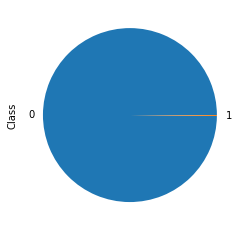

In [189]:
#Plotting the class percentage
(df.groupby('Class')["Class"].count()/df["Class"].count()*100) .plot.pie()

In [190]:
classes = df["Class"].value_counts()
legitimate_share = classes[0]/df["Class"].count() *100
fraud_share = classes[1]/df["Class"].count()*100
print(legitimate_share,  fraud_share)

99.82725143693798 0.1727485630620034


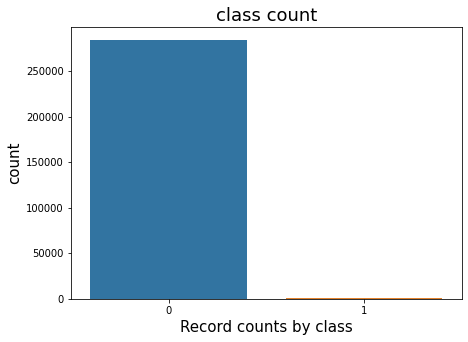

In [191]:
plt.figure(figsize=(7,5))
sns.countplot(df["Class"])
plt.title("class count", fontsize =18)
plt.xlabel("Record counts by class", fontsize = 15)
plt.ylabel("count", fontsize  =15)
plt.show()

In [192]:
#Correlation between the attributes
corr= df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


<function matplotlib.pyplot.show(*args, **kw)>

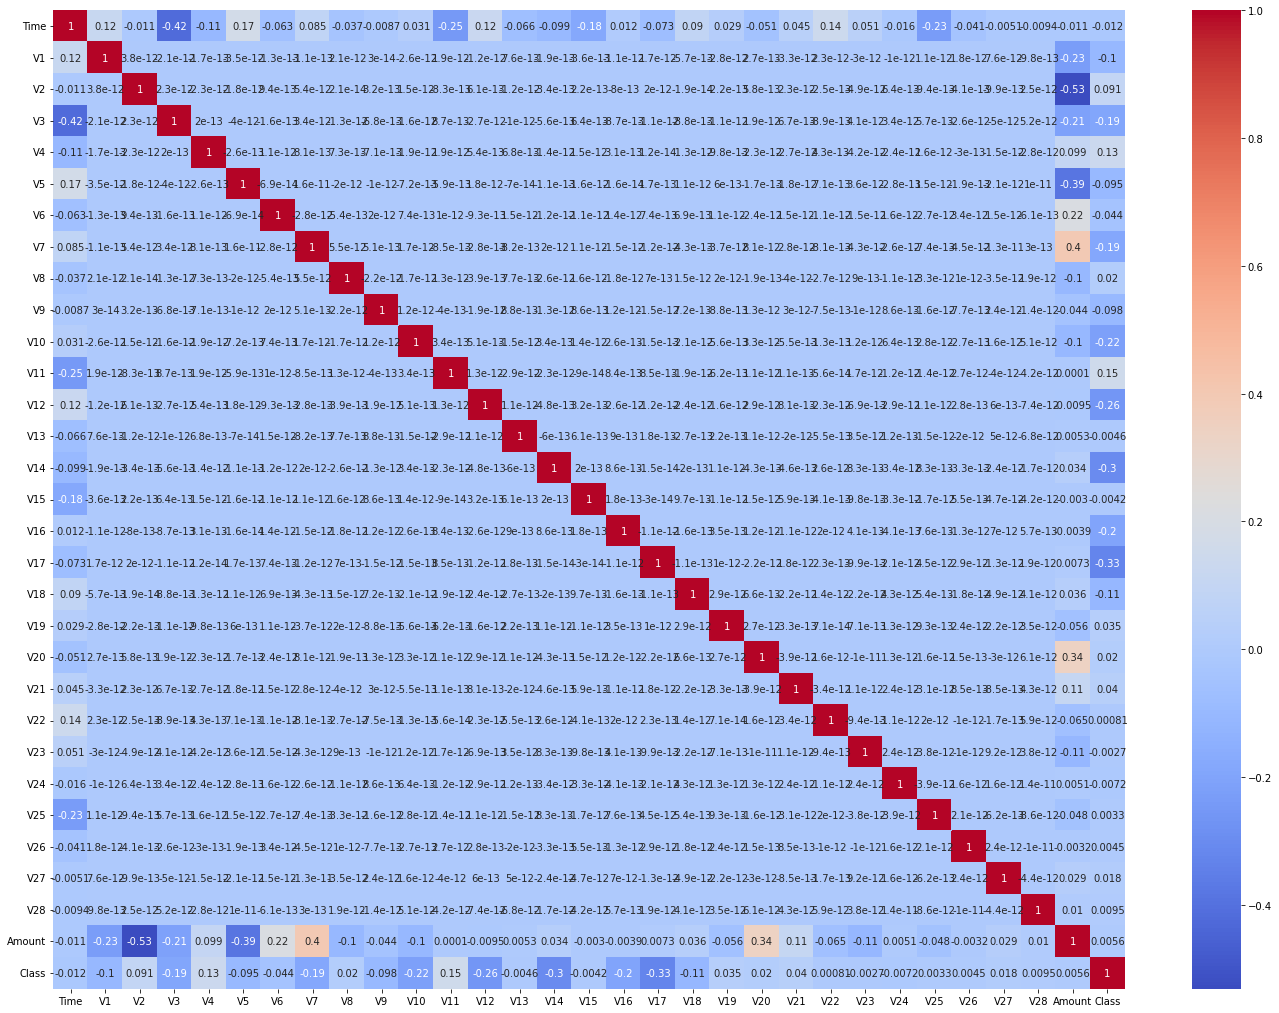

In [193]:
#correlation matrix
plt.figure(figsize =  (24, 18))
sns.heatmap(corr, cmap = "coolwarm", annot = True)
plt.show

In [194]:
#feature engineering
# To devide time into day, hours and minutes
Delta_Time = pd.to_timedelta(df["Time"], unit = "s")

In [195]:
df["Time_Day"] = (Delta_Time.dt.components.days).astype(int)
df["Time_Hour"] = (Delta_Time.dt.components.hours).astype(int)
df["Time_Min"] = (Delta_Time.dt.components.minutes).astype(int)

In [196]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V24       V25  \
0       0.462388  0.239599  0.

In [197]:
#Dropping day and minute
df.drop([ 'Time_Day', 'Time_Min'], axis = 1, inplace =True)


In [198]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V22       V23  \
0       0.462388  0.239599  0.

In [199]:
#splitting the dataset into x and y
y=df["Class"]
X = df.drop(["Class"], axis =1)

In [200]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [201]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [202]:
#combining all the columns to one variable
cols = list(X.columns.values)

In [203]:
#creating a dataframe to store results
df_Results =pd.DataFrame(columns=["Methodology", "Model", "Accuracy", "roc_value", "threshold"])

In [204]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.23709

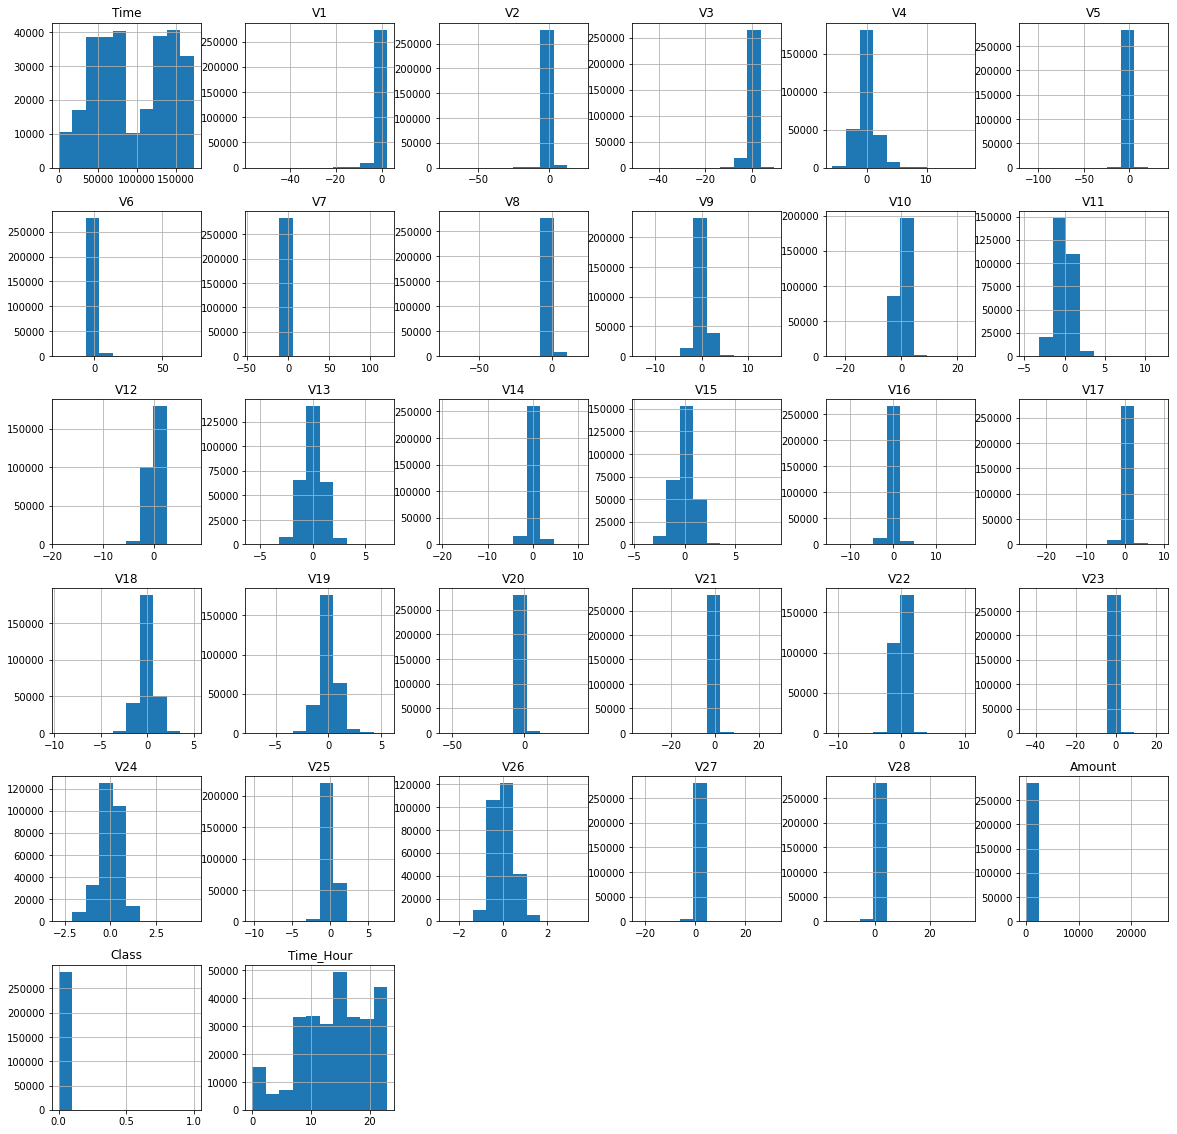

In [205]:
#Plot histogram
df.hist(figsize = (20,20))
plt.show()

In [206]:
#Getting all columns together
columns = df.columns.tolist()

#filtering to remove Class

columns = [c for c in columns if c not in ["Class"]]
target = "Class"
#setting class as target and other column as variable since we are building an unsupervised model
X = df[columns]
Y = df[target]

#Getting the shape of the data
print(X.shape)

Y.shape

(284807, 31)


(284807,)

In [207]:
# Determine no of fraud cases in dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

# calculate percentages for Fraud & Valid 
outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases : {}'.format(len(Fraud)))
print('Valid Cases : {}'.format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


MODEL BUILDING

In [208]:
# Creating a common function to plot confusion matrix
def Plot_confusion_matrix(Y, y_pred):
  cm = confusion_matrix(Y, y_pred)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Valid','Fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [209]:
# Setting up the model

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve

#defining a random state
state =10

#defining the outliers detection method
classifiers = {
    "Isolation forest": IsolationForest(max_samples =len(X),
                                        contamination= outlier_fraction,
                                        random_state = state ), 
     "Local Outlier Factor" : LocalOutlierFactor(
         n_neighbors =20,
         contamination = outlier_fraction)          
}


Isolation forest: 635
0.9977704199686103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.35      0.36      0.36       492

    accuracy                           1.00    284807
   macro avg       0.68      0.68      0.68    284807
weighted avg       1.00      1.00      1.00    284807

Cohen Kappa score:  0.3542132292957356


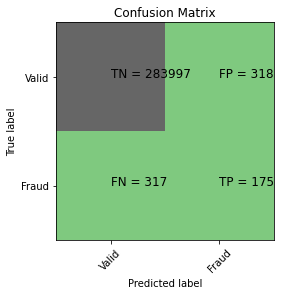

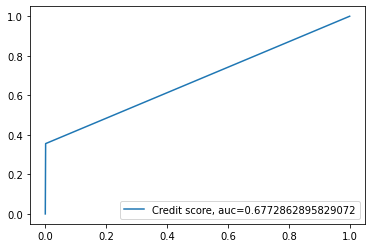

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807

Cohen Kappa score:  0.04911711715198863


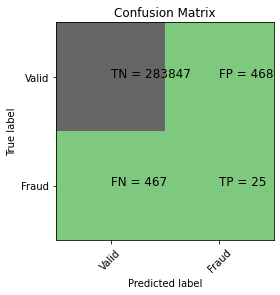

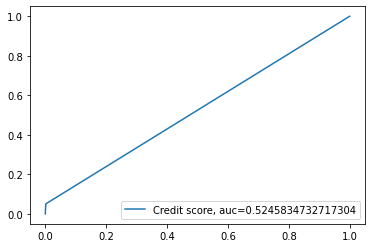

In [210]:
#Fit the model
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
 
 #fit the data and tag outliers
 if clf_name =="Local Outlier Factor":
   y_pred =clf.fit_predict(X)
   scores_pred =clf.negative_outlier_factor_
 else:
    clf.fit(X)
    scores_pred =clf.decision_function(X)
    y_pred = clf.predict(X)

 #Reshape the prediction values to 0 for valid, 1 for fraud
 y_pred[y_pred ==1] = 0
 y_pred[y_pred ==-1] = 1

 #printing error
 n_errors = (y_pred != Y).sum()
 #Run classification metrics
 print("{}: {}".format(clf_name, n_errors))
 print(accuracy_score(Y, y_pred))
 print(classification_report(Y, y_pred))
 cohen_kappa = cohen_kappa_score(Y,y_pred)
 print('Cohen Kappa score: ',cohen_kappa)
 Plot_confusion_matrix(Y,y_pred)
 fpr, tpr, _ = metrics.roc_curve(Y,y_pred)
 auc = metrics.roc_auc_score(Y,y_pred)
 plt.plot(fpr,tpr,label="Credit score, auc="+str(auc))
 plt.legend(loc=4)
 plt.show()


In [211]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(Y, y_pred):
  cm = confusion_matrix(Y, y_pred)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Normal','Fraud']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()


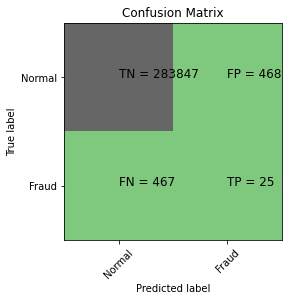

In [212]:
Plot_confusion_matrix(Y, y_pred)

UNDERSAMPLING TECHNIQUE

In [213]:
Fraud_sample = Fraud.sample(n=492)
Valid_sample = Valid.sample(n=4000)
data_sample = pd.concat([Fraud_sample, Valid_sample], axis =0)

In [214]:
print('Fraud sample Cases : {}'.format(len(Fraud_sample)))
print('Valid sample Cases : {}'.format(len(Valid_sample)))

Fraud sample Cases : 492
Valid sample Cases : 4000


In [215]:

# calculate percentages for Fraud & Valid 
outlier_sample = len(Fraud_sample) / float(len(Valid_sample))
print(outlier_sample)

#splitting the dataset into x and y
y_sample=data_sample["Class"]
X_sample = data_sample.drop(["Class"], axis =1)

0.123


In [216]:
# Setting up the model

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

#defining a random state
state =5

#defining the outliers detection method
classifiers = {
    "Isolation forest": IsolationForest(max_samples =len(X_sample),
                                        contamination= outlier_sample,
                                        random_state = state ), 
     "Local Outlier Factor" : LocalOutlierFactor(
         n_neighbors =20,
         contamination = outlier_sample)          
}


Isolation forest: 337
0.9249777382012466
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4000
           1       0.64      0.72      0.68       492

    accuracy                           0.92      4492
   macro avg       0.80      0.83      0.82      4492
weighted avg       0.93      0.92      0.93      4492

Cohen Kappa score:  0.63522689704163


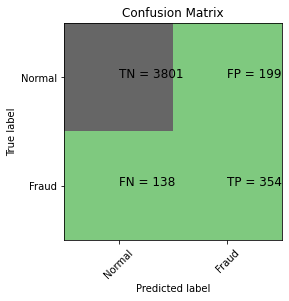

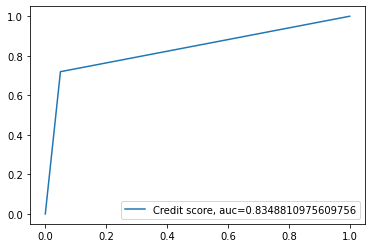

Local Outlier Factor: 879
0.8043187889581478
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4000
           1       0.15      0.17      0.16       492

    accuracy                           0.80      4492
   macro avg       0.52      0.53      0.52      4492
weighted avg       0.81      0.80      0.81      4492

Cohen Kappa score:  0.048559176556655204


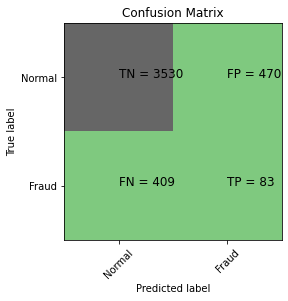

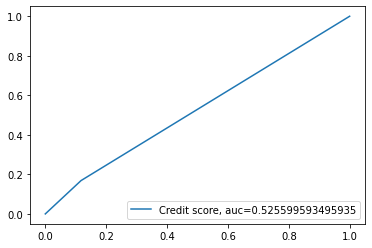

In [217]:
#Fit the model
n_outliers = len(Fraud_sample)
for i, (clf_name, clf) in enumerate(classifiers.items()):
 
 #fit the data and tag outliers
 if clf_name =="Local Outlier Factor":
   y_pred3 =clf.fit_predict(X_sample)
   scores_pred3 =clf.negative_outlier_factor_
 else:
    clf.fit(X_sample)
    scores_pred3 =clf.decision_function(X_sample)
    y_pred3 = clf.predict(X_sample)

  #Reshape the prediction values to 0 for valid, 1 for fraud
 y_pred3[y_pred3 ==1] = 0
 y_pred3[y_pred3 ==-1] = 1

 #printing error
 n_errors = (y_pred3 != y_sample).sum()
 #Run classification metrics
 #Run classification metrics
 print("{}: {}".format(clf_name, n_errors))
 print(accuracy_score(y_sample, y_pred3))
 print(classification_report(y_sample, y_pred3))
 cohen_kappa = cohen_kappa_score(y_sample, y_pred3)
 print('Cohen Kappa score: ',cohen_kappa)
 Plot_confusion_matrix(y_sample, y_pred3)
 fpr, tpr, _ = metrics.roc_curve(y_sample,  y_pred3)
 auc = metrics.roc_auc_score(y_sample,  y_pred3)
 plt.plot(fpr,tpr,label="Credit score, auc="+str(auc))
 plt.legend(loc=4)
 plt.show()


>1 0.491 (0.032)
>2 0.890 (0.002)
>3 0.969 (0.015)
>4 0.971 (0.009)
>5 0.975 (0.009)
>6 0.981 (0.007)
>7 0.979 (0.007)
>8 0.978 (0.008)
>9 0.978 (0.005)
>10 0.978 (0.007)
>11 0.978 (0.006)
>12 0.978 (0.006)


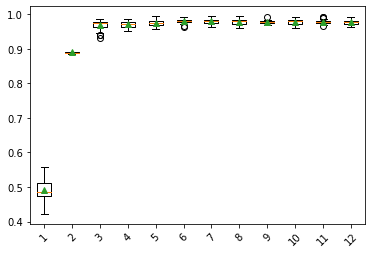

In [221]:
from pandas import plotting
# comparing PCA number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt



#Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10)  

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,13):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X1, y1):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X1, y1 = X_train, Y_train
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X1, y1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

Confusion Matrix: 
 [[779   7]
 [ 23  90]]


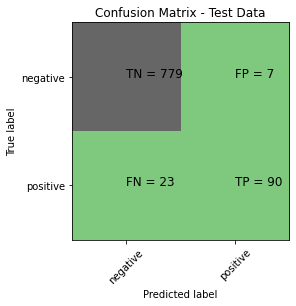


Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       786
           1       0.93      0.80      0.86       113

    accuracy                           0.97       899
   macro avg       0.95      0.89      0.92       899
weighted avg       0.97      0.97      0.97       899

Precision = 0.9278350515463918

Recall = 0.9666295884315906

Overall Accuracy = 0.9666295884315906

Kappa Score = 0.8383752427068102



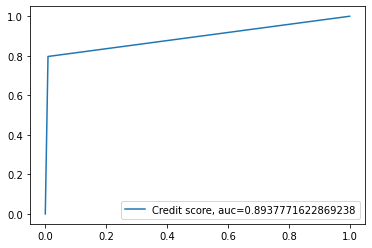

In [222]:
##Logistic Regression Classification for Sampled data

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Created a common function to plot confusion matrix
def Plot_confusion_matrix(Y_test, predicted):
  cm = confusion_matrix(Y_test, predicted)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['negative','positive']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

Y=data_sample["Class"]
X = data_sample.drop(["Class"], axis =1)


#Train Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(Y_test, predicted)
print("Confusion Matrix: \n", conf)
Plot_confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)

print("\nClassification report: \n",report)


# precision
precision_score(Y_test, predicted)
print(f"Precision = {precision_score(Y_test, predicted)}\n")

# recall
recall_score(Y_test, predicted, average='weighted')
print(f"Recall = {recall_score(Y_test, predicted, average='weighted')}\n")


# overall accuracy
accuracy_score(Y_test, predicted)
print(f"Overall Accuracy = {accuracy_score(Y_test, predicted)}\n")

# kappa score
cohen_kappa_score(Y_test, predicted)
print(f"Kappa Score = {cohen_kappa_score(Y_test, predicted)}\n")
fpr, tpr, _ = metrics.roc_curve(Y_test,  predicted)
auc = metrics.roc_auc_score(Y_test,  predicted)
plt.plot(fpr,tpr,label="Credit score, auc="+str(auc))
plt.legend(loc=4)
plt.show()